* 분류 모델의 여러 성능을 측정하는 get_clf_eval 함수작성

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    print("Confusion Matrix")
    print(confusion)
    print("Accuracy: {0:.4f}, Precision: {1:.4f}, \
    Recall: {2:.4f}".format(accuracy, precision, recall))

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [3]:
df_titanic = pd.read_csv('/drive/MyDrive/Colab/AI2/Third_ML/titanic.csv')
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# 변수별 결측값, 타입 확인
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
## 간단한 전처리 과정 

# 필요 없는 변수 제거
features_drop = ['Name', 'Ticket', 'Cabin', 'Parch']
df_titanic = df_titanic.drop(features_drop, axis=1)

# 결측치 제거
df_titanic = df_titanic[df_titanic['Age'].notna()]

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Fare         714 non-null    float64
 7   Embarked     712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.2+ KB


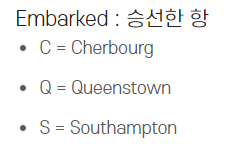

In [6]:
# 승선지 변수 개수 파악
df_titanic['Embarked'].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [7]:
# 승선지 변수는 최빈값으로 대체
# fillna( ) 함수를 이용하여 결측치를 특정 값으로 대체
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

df_titanic['Embarked'].value_counts()

S    556
C    130
Q     28
Name: Embarked, dtype: int64

In [8]:
df_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,male,22.0,1,7.2500,S
1,2,1,1,female,38.0,1,71.2833,C
2,3,1,3,female,26.0,0,7.9250,S
3,4,1,1,female,35.0,1,53.1000,S
4,5,0,3,male,35.0,0,8.0500,S


In [9]:
# map 함수를 이용하여 인코딩 진행
df_titanic['Sex'] = df_titanic['Sex'].map({'female':0, 'male':1})
df_titanic['Embarked'] = df_titanic['Embarked'].map({'C':0, 'Q':1, 'S':2})

df_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,1,22.0,1,7.2500,2
1,2,1,1,0,38.0,1,71.2833,0
2,3,1,3,0,26.0,0,7.9250,2
3,4,1,1,0,35.0,1,53.1000,2
4,5,0,3,1,35.0,0,8.0500,2


* 타이타닉 데이터 데이터 분할

In [10]:
# y 변수(결과)만 추출 
df_y = df_titanic['Survived']

# y변수 제거
df_X = df_titanic.drop('Survived', axis=1)

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, 
                                                    random_state=11)

* LogisticRegression 모델을 이용하여 타이타닉 생존자 분류 모델 학습
* get_clf_eval() 함수를 이용하여 성능 측정

In [11]:
from sklearn.linear_model import LogisticRegression

# 모델 객체 생성
lr_clf = LogisticRegression()

# 학습
lr_clf.fit(X_train, y_train)

# 학습된 모델에 test 데이터를 통해 예측 값 추출
pred = lr_clf.predict(X_test)

# 성능 측정
get_clf_eval(y_test, pred)

Confusion Matrix
[[65 20]
 [20 38]]
Accuracy: 0.7203, Precision: 0.6552,     Recall: 0.6552


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
